<a href="https://colab.research.google.com/github/aakratiyadav/Credit-Card-Fraud-Detection/blob/main/FraudCreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CREDIT CARD FRAUD DETECTION**

In [ ]:
# CREDIT CARD FRAUD DETECTION
# Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Load the dataset
credit_card_data = pd.read_csv('/content/sample_data/creditcard.csv')

NameError: name 'pd' is not defined

In [ ]:
# Printing first five rows of the dataset
credit_card_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
31775,36510,1.497714,-0.874208,0.004261,-1.537368,-1.044513,-0.733905,-0.644635,-0.186510,-2.380495,...,-0.527761,-1.248016,0.145825,-0.061193,0.250252,-0.526898,0.003761,0.007950,24.90,0.0
31776,36512,-0.407854,0.940336,1.533733,-0.018123,-0.219400,-0.934602,0.597172,0.024610,-0.151850,...,-0.247570,-0.725830,-0.006221,0.322366,-0.249413,0.076587,0.255380,0.117340,1.79,0.0
31777,36513,-0.434226,-3.705556,0.194223,0.139216,-2.066818,1.220137,-0.278115,0.281452,-0.161302,...,0.620431,0.040315,-0.690176,-0.226844,-0.123369,-0.291412,-0.080514,0.155457,861.12,0.0
31778,36513,-0.274278,1.004565,1.336430,-0.164777,0.404935,-0.418731,0.853252,-0.148772,-0.546969,...,-0.277437,-0.579135,-0.097793,-0.037926,-0.157882,0.044814,0.078376,-0.137035,9.72,0.0
31779,36513,1.295137,0.096775,0.348134,0.629896,-0.172700,-0.154350,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
credit_card_data.shape

(152629, 31)

In [ ]:
#DataSet Information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152629 entries, 0 to 152628
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    152629 non-null  int64  
 1   V1      152629 non-null  float64
 2   V2      152629 non-null  float64
 3   V3      152629 non-null  float64
 4   V4      152629 non-null  float64
 5   V5      152629 non-null  float64
 6   V6      152629 non-null  float64
 7   V7      152629 non-null  float64
 8   V8      152628 non-null  float64
 9   V9      152628 non-null  float64
 10  V10     152628 non-null  float64
 11  V11     152628 non-null  float64
 12  V12     152628 non-null  float64
 13  V13     152628 non-null  float64
 14  V14     152628 non-null  float64
 15  V15     152628 non-null  float64
 16  V16     152628 non-null  float64
 17  V17     152628 non-null  float64
 18  V18     152628 non-null  float64
 19  V19     152628 non-null  float64
 20  V20     152628 non-null  float64
 21  V21     15

In [ ]:
#Checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
credit_card_data.dropna(inplace = True)

In [ ]:
# distribution of legit transaction and fraudulwnt transactions
credit_card_data['Class'].value_counts()

Class
0.0    152298
1.0       330
Name: count, dtype: int64

This DataSet is highly biased

0--> Normal Transaction
1--> Fradulent transaction

In [ ]:
#seprating the data for analysis
legit = credit_card_data[credit_card_data.Class ==0]
fraud = credit_card_data[credit_card_data.Class ==1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(152298, 31)
(330, 31)


In [ ]:
#Statistical measure for the data
legit.Amount.describe()

count    152298.000000
mean         88.762926
std         246.776996
min           0.000000
25%           5.840000
50%          22.710000
75%          79.000000
max       19656.530000
Name: Amount, dtype: float64

In [ ]:
#Statistical measure for the data
fraud.Amount.describe()

count     330.000000
mean      115.783606
std       233.695450
min         0.000000
25%         1.000000
50%        12.310000
75%       103.397500
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
#Compare the values for both transaction
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,54905.417425,-0.226625,0.035112,0.628662,0.123235,-0.232836,0.073228,-0.089445,0.050731,-0.035221,...,0.039485,-0.039747,-0.110632,-0.028781,0.011968,0.117875,0.022418,0.001432,0.002775,88.762926
1.0,52195.178788,-5.938595,4.257998,-7.859258,4.800682,-4.405201,-1.530096,-6.721001,1.254498,-2.814301,...,0.308288,1.038752,-0.134902,-0.058691,-0.063835,0.121347,0.037563,0.267357,0.057408,115.783606


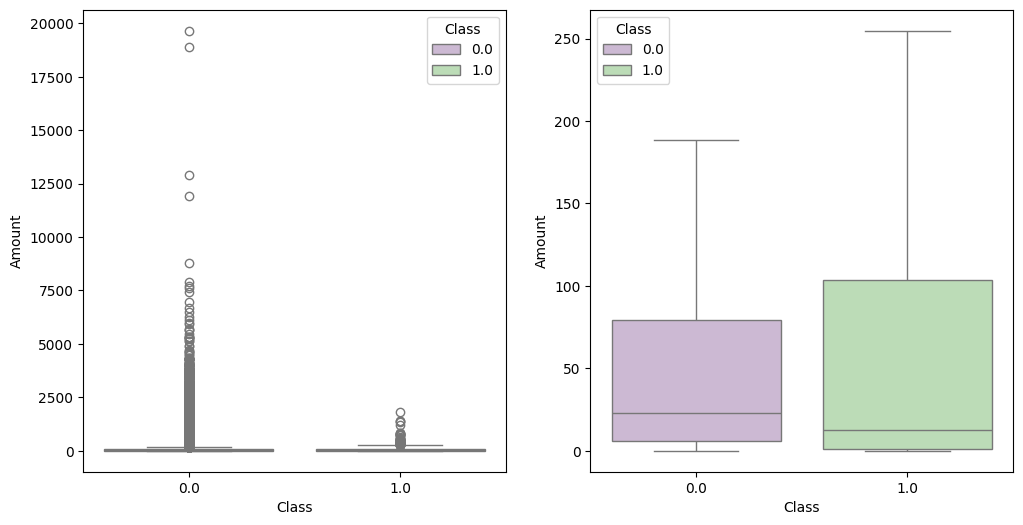

In [ ]:
# Data Exploration
#Transaction Amount

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=credit_card_data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=credit_card_data, palette="PRGn",showfliers=False)
plt.show();

<ipython-input-56-6a55bec47f74>:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
<ipython-input-56-6a55bec47f74>:16: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
<ipython-input-56-6a55bec47f74>:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
<ipython-input-56-6a55bec47f74>:16: UserWar

<Figure size 640x480 with 0 Axes>

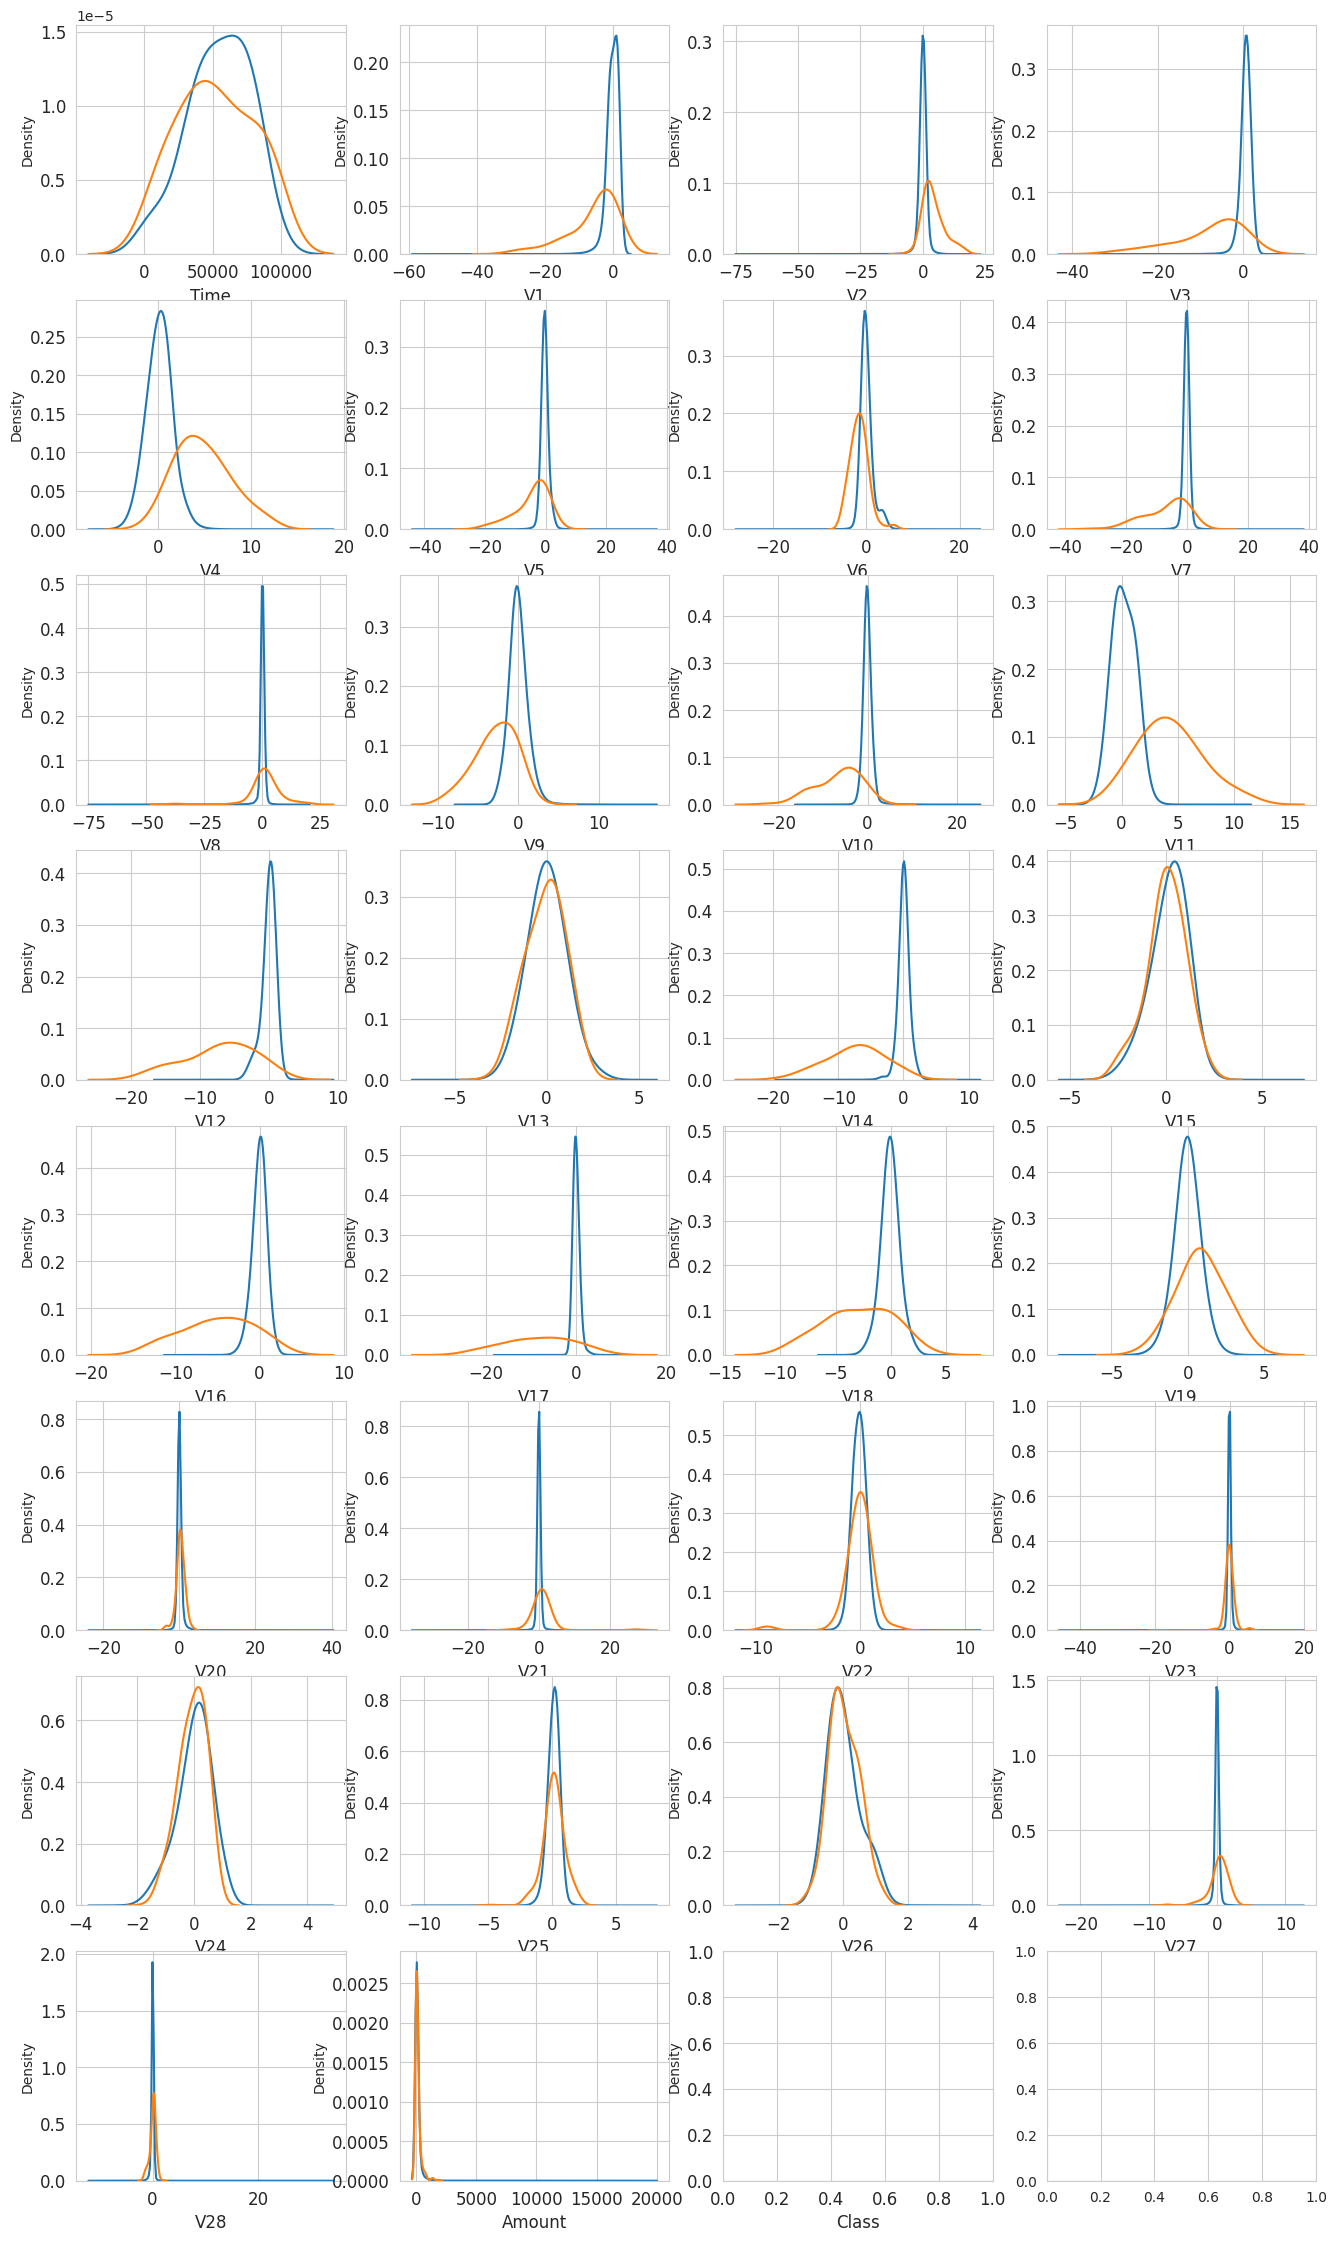

In [ ]:
# Feature Density Plot
var = credit_card_data.columns.values

i = 0
t0 = credit_card_data.loc[credit_card_data['Class'] == 0]
t1 = credit_card_data.loc[credit_card_data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [ ]:
# For some of the features we can observe a good selectivity in terms of distribution for the two values of Class:
#V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are
# partially separated, V1, V2, V3, V10 have a quite distinct profile,
# whilst V25, V26, V28 have similar profiles for the two values of Class.
#In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions
# (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities.
# In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

In [ ]:
# Lets see the distribution of the time and amount
credit_card_data['Hour'] = credit_card_data['Time'].apply(lambda x: np.floor(x / 3600))

tmp = credit_card_data.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()


,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0.0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1.0,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0.0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1.0,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0.0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


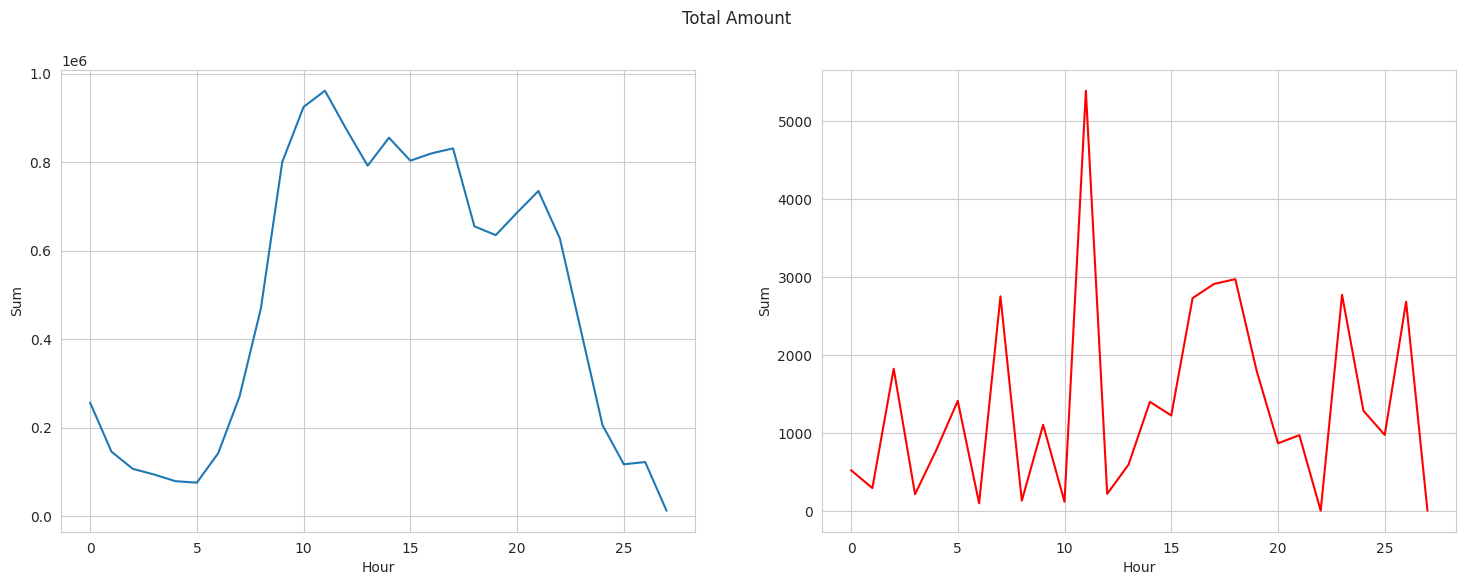

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();
# There is no difference as such as both the legit and fraud amoiunt is devided unifromly

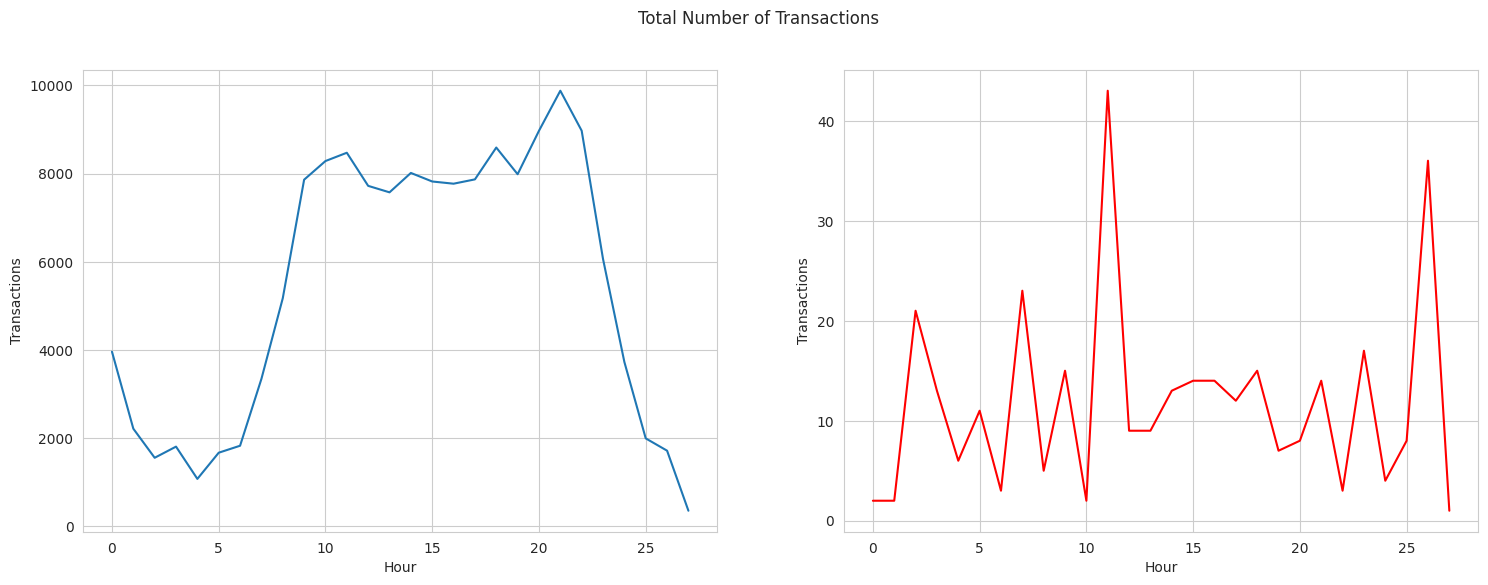

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();
# No such a vital information

<ipython-input-64-252cfe62f34b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(credit_card_data['Time'], ax=ax1, color='y')
<ipython-input-64-252cfe62f34b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(credit_card_data['Amount'], ax=ax2, color='r')


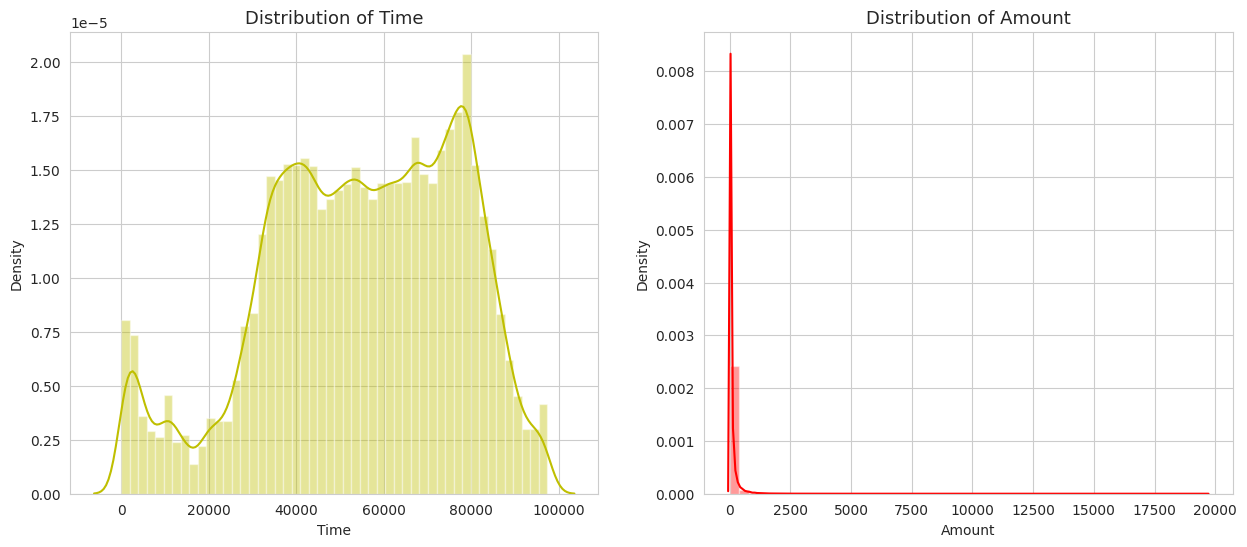

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1 = sns.distplot(credit_card_data['Time'], ax=ax1, color='y')
ax2 = sns.distplot(credit_card_data['Amount'], ax=ax2, color='r')
ax1.set_title('Distribution of Time', fontsize=13)
ax2.set_title('Distribution of Amount', fontsize=13)
plt.show()

In [ ]:
# To normalize the distribution we are going to use a method called Feature Scaling.
# In our case it is better to use the Robust Scaler algorithm because it's robust to outliers

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
credit_card_data['scaled_amount'] = rs.fit_transform(credit_card_data['Amount'].values.reshape(-1,1))
credit_card_data['scaled_time'] = rs.fit_transform(credit_card_data['Time'].values.reshape(-1,1))
credit_card_data.drop(['Time', 'Amount'], axis=1, inplace=True)

scaled_amount = credit_card_data['scaled_amount']
scaled_time = credit_card_data['scaled_time']
credit_card_data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
credit_card_data.insert(0, 'scaled_amount', scaled_amount)
credit_card_data.insert(0, 'scaled_time', scaled_time)
credit_card_data.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Hour
0,-1.651060,1.733406,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,0.0
1,-1.651060,-0.273286,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,0.0
2,-1.651031,4.861513,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,0.0
3,-1.651031,1.376673,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,0.0
4,-1.651001,0.645862,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

   Non-fraud       1.00      1.00      1.00     30450
       Fraud       0.89      0.62      0.73        76

    accuracy                           1.00     30526
   macro avg       0.94      0.81      0.86     30526
weighted avg       1.00      1.00      1.00     30526



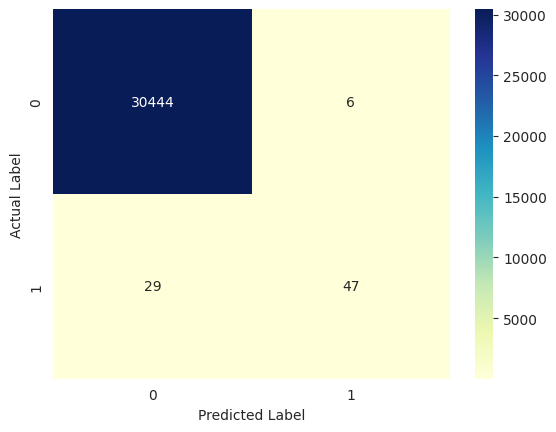

In [ ]:
# Logistic Regression without SMOTE

from sklearn.model_selection import train_test_split as holdout
x = np.array(credit_card_data.iloc[:, credit_card_data.columns != 'Class'])
y = np.array(credit_card_data.iloc[:, credit_card_data.columns == 'Class'])
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, precision_score, recall_score, accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

score = LogisticRegression.score(X_test, y_test)
print("Test Accuracy Score",)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Non-fraud', 'Fraud']
print(classification_report(y_test, y_pred, target_names=labels))


In [ ]:
# As we can see this is not a good model, because it is biased towards majority class
# and the recall in minority class is not as high as disired

In [ ]:
from imblearn.over_sampling import SMOTE

print("Transaction Number x_train dataset: ", x_train.shape)
print("Transaction Number y_train dataset: ", y_train.shape)
print("Transaction Number x_test dataset: ", x_test.shape)
print("Transaction Number y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_s, y_train_s = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(x_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))


Transaction Number x_train dataset:  (122102, 31)
Transaction Number y_train dataset:  (122102, 1)
Transaction Number x_test dataset:  (30526, 31)
Transaction Number y_test dataset:  (30526, 1)
Before OverSampling, counts of label '1': [254]
Before OverSampling, counts of label '0': [121848] 

After OverSampling, the shape of train_x: (243696, 31)
After OverSampling, the shape of train_y: (243696,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     30450
         1.0       0.09      0.95      0.17        76

    accuracy                           0.98     30526
   macro avg       0.55      0.96      0.58     30526
weighted avg       1.00      0.98      0.99     30526



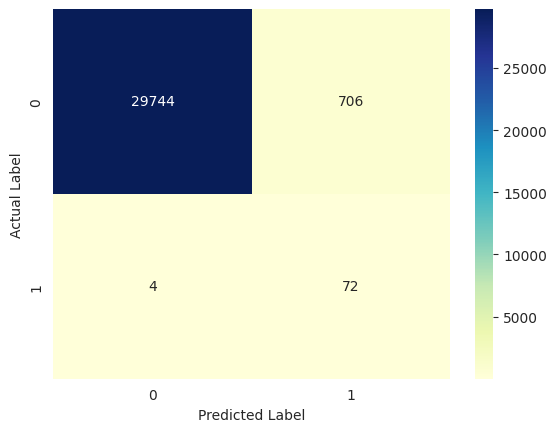

In [ ]:
# Now the dataset is balanced, so we can build a Logistic Regression model with SMOTE.
logreg = LogisticRegression()
logreg.fit(x_train_s, y_train_s)
y_pred = logreg.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))
score = LogissticRegression.score()

Text(0.5, 1.0, 'Precision Recall Curve')

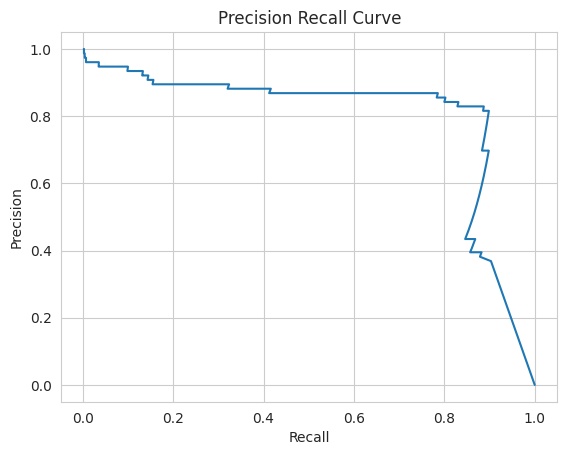

In [ ]:
y_pred_prob = logreg.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

In [ ]:
# We got a high recall which means our model is able to detect the highest number of fraud transactions,
#  while the precision is very low which is not good because it means that the model classifies a lot of non-fraud transactions as fraud.
# The customers of a financial institution are not going to be satisfied with that fact and may even stop using the service
# of that financial institution. So in this case it's also important to have a high precision,
# which we are going to try to achieve with Random Forest

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     30450
         1.0       0.94      0.86      0.90        76

    accuracy                           1.00     30526
   macro avg       0.97      0.93      0.95     30526
weighted avg       1.00      1.00      1.00     30526



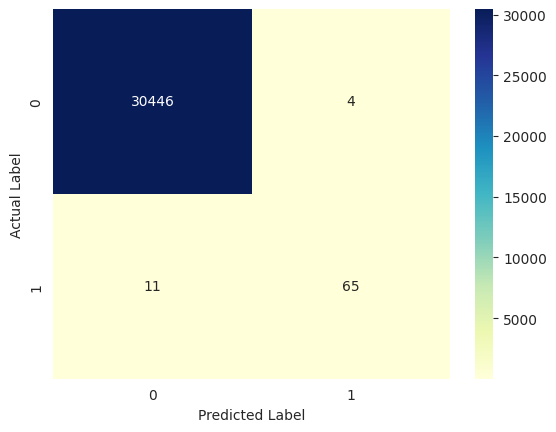

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc
rand_f = rfc(n_estimators=1000, min_samples_split=10, min_samples_leaf=1,
           max_leaf_nodes=None,
           oob_score=True, n_jobs=-1, random_state=1)
rand_f.fit(x_train_s, y_train_s)
y_pred = rand_f.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))